###**Name - Piyush Kumar Gupta**
###**Branch - Data Science 3rd yr (5th sem)**
###**Collage -  NOIDA INSTITUTE OF ENGINEERING AND TECHNOLOGY**
###**Roll No. - 2201331540131**

# **Problem Statement** - Analys and Predict Wheather the Person is infected a Heart desease or not Infected on the basis of Simple linear regression using Logistic Regression classifier.

###**DataSet** - New John Hopkins Hospital,Californi

#Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
df = pd.read_csv("/content/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#EDA-Exploratory Data Analysis

In [24]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

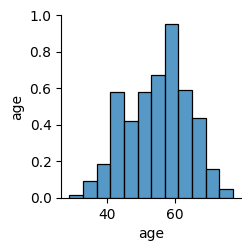

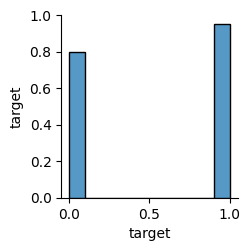

In [25]:
sns.pairplot(df[['age']])
plt.show()
sns.pairplot(df[['target']])
plt.show()

#Heatmap to show correlation

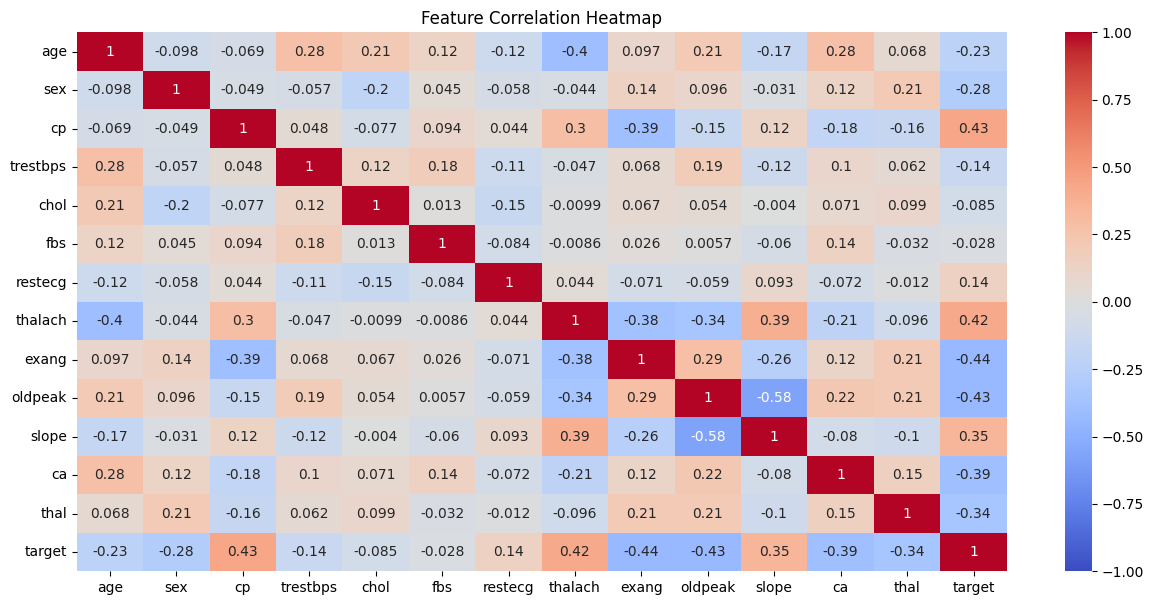

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

#Feature and target selection

In [27]:
x = df[['age','cp','thalach']]
y = df['target']

#split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# model initialization and training
model = LogisticRegression()
model.fit(x_train, y_train)

#Predictions and performance metrics
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)



In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score
# model performance
arruracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {arruracy:.2f}")

class_pred = classification_report(y_test,y_pred)
print("Classification Report:\n",class_pred)


Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



#User input functin for prediction

In [30]:
def max_heart_rate():
  age = int(input("Enter Age:"))
  cp = int(input("Enter Chest Pain(0-3):"))
  thalach = int(input("Enter maximum heart rate achived:"))

  #Create DataFrame
  user_data = pd.DataFrame([[age,cp,thalach]],columns = ['age','cp','thalach'])

  predict = model.predict(user_data)
  if predict == 0:
    print("No,Heart Desease")
  else:
    print("Yes, Person is Suffering from Heart Disease")
max_heart_rate()

Enter Age:59
Enter Chest Pain(0-3):0
Enter maximum heart rate achived:70
No,Heart Desease
